<a href="https://colab.research.google.com/github/saraswatnitin/CausalInferenceDiscoverywithML/blob/main/4_Graphical_Models_Causal_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Graphical Models for Causal Inference
In this section we will focus on graphical models for causal inference. We start with a refresher on graphs. Next, we introduce a concept of graphical models and directed  acyclic graphs. Finally, we discuss the limitations of DAGs and show a couple of different approaches to model cyclic relationships. This and next section are critical to understand the very essence of causal inference.

In [2]:

import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import graphviz

In [3]:

COLORS = [
    '#00B0F0',
    '#FF0000'
]

## Visualizations

In [4]:
nodes = ['A', 'B', 'C', 'D']

In [5]:
# Define graphs
graphs = {

    'DAG': {
        'graph': graphviz.Digraph(format='png'),
        'edges': ['AB', 'BC', 'AD', 'DC']
    },

    'DCG': {
        'graph': graphviz.Digraph(format='png'),
        'edges': ['AB', 'AD', 'BB', 'BC', 'DC', 'CA']
    },

    'Undirected': {
        'graph': graphviz.Graph(format='png'),
        'edges': ['AB', 'BC', 'AD', 'DC']
    },

    'Fully connected': {
        'graph': graphviz.Graph(format='png'),
        'edges': ['AB', 'AC', 'AD', 'BC', 'BD', 'CD']
    },

    'Partially connected': {
        'graph': graphviz.Graph(format='png'),
        'edges': ['AB', 'AC', 'BC']
    }
}


# Iterate over graphs and render
for name, graph in graphs.items():

    [graph['graph'].node(n) for n in nodes]
    graph['graph'].edges(graph['edges'])

    graph['graph'].render(f'img/ch_04_graph_{name}')

### Adjacency matrices

$$\Large \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix}$$

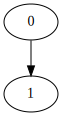

In [6]:

graph = graphviz.Digraph(format='png')

nodes = ['0', '1']

edges = ['01']

[graph.node(n) for n in nodes]
graph.edges(edges)

graph.render(f'img/ch_04_graph_adj_00')

graph

$$\Large \begin{bmatrix} 0 & 1 & 0 \\ 0 & 0 & 0 \\ 1 & 1 & 0 \end{bmatrix}$$

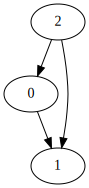

In [8]:
graph = graphviz.Digraph(format='png')

nodes = ['0', '1', '2']

edges = ['01', '21', '20']

[graph.node(n) for n in nodes]
graph.edges(edges)

graph.render(f'img/ch_04_graph_adj_01')

graph

$$\Large \begin{bmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 \\ 1 & 0 & 1 & 0 \end{bmatrix}$$

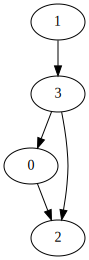

In [9]:


graph = graphviz.Digraph(format='png')

nodes = ['0', '1', '2', '3']

edges = ['02', '13', '32', '30']

[graph.node(n) for n in nodes]
graph.edges(edges)

graph.render(f'img/ch_04_graph_adj_02')

graph

## Graphs in Python

In [10]:

import networkx as nx

### Edge list

### GML

**GML** stands for graph modeling language.

More on **GML** synatx here: https://github.com/GunterMueller/UNI_PASSAU_FMI_Graph_Drawing/blob/master/GML/gml-technical-report.pdf

In [11]:
# Define the graph
sample_gml = """graph [
directed 1

node [
    id 0
    label "0"
    ]

node [
    id 1
    label "1"
    ]

node [
    id 2
    label "2"
    ]


edge [
    source 0
    target 1
    ]

edge [
    source 2
    target 1
    ]
]

    """

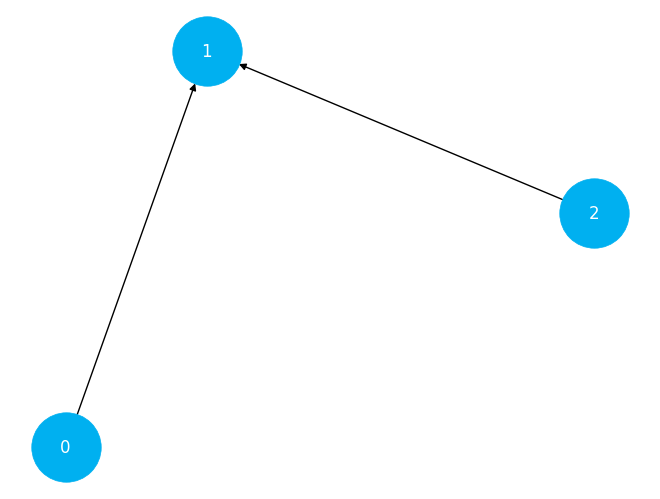

In [12]:
# Get the graph
graph = nx.parse_gml(sample_gml)

# Plot
nx.draw(
    G=graph,
    with_labels=True,
    node_size=2500,
    node_color=COLORS[0],
    font_color='white'
)

### Adjacency matrix

In [13]:

# Define the matrix
adj_matrix = np.array([
    [0, 1, 0],
    [0, 0, 0],
    [0, 1, 0]
])

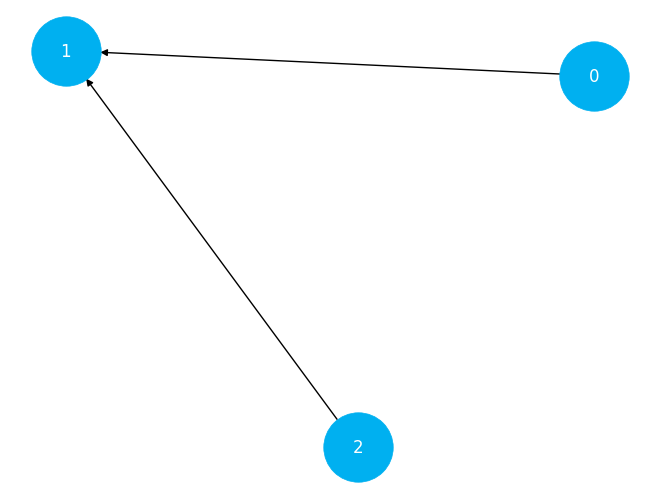

In [16]:

# Get the graph
#graph = nx.from_numpy_matrix(adj_matrix, create_using=nx.DiGraph)

graph = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

# Plot
nx.draw(
    G=graph,
    with_labels=True,
    node_size=2500,
    node_color=COLORS[0],
    font_color='white'
)

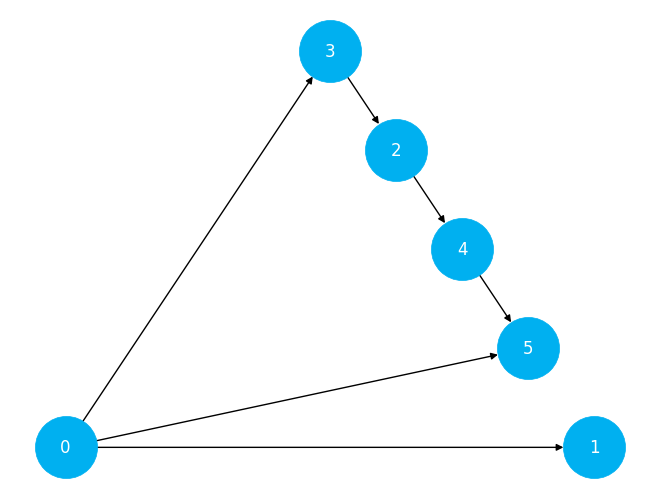

In [18]:
# Define the matrix
adj_matrix = np.array([
    [0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
])

# Get the graph
graph = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)


# Plot
nx.draw(
    G=graph,
    with_labels=True,
    node_size=2000,
    node_color=COLORS[0],
    font_color='white',
    pos=nx.planar_layout(graph)
)